# Pymaceuticals Inc.
---

### Analysis

   Utilizing the mice sample data of 249 mice that have Small Cell Carcinoma (SCC), there appears to be four drugs that show some promise.  Infubinol, Ceftamin, Ramicane, and Capomulin.  The reason these four drugs were choosen to be analyzed further was that they had the smallest (<0.05 SEM) which shows the amount of discrepancy between the sample populations and the total population.  This means that the data for these four drugs show the minimalist amount of deviation from the over all population of mice.  Both Capomulin and Ramicane have the lowest Mean, and lowest standard deviation compared to Infubinol, and Ceftamin. Capomulin and Ramicane are the best potential SCC cancer therapy drugs, they both also show a large decrease in total tumor volume (mm3).  There was an outlier for Infubinol that should be ignored, one single mouse had a drastic decrease well outside of the lower quartile range.  This value could possibly be true, maybe this mouse has a peculiar strain of SCC that responds well to Infubinol and could lead to possible other research.  However this data point shouldn't be considered as an example of how well Infubinol is at pushing SCC to remission for this study. Capomulin was picked to to further show that the Tumor Volume (mm3) over 45 days had a drastic decrease on the mice sample that used this drug.  There was a positive correlation between weight of the mouse and the Tumor Volume (mm3).  This could in some ways be indicative that the cancer treatments should have varying concentration amounts based upon the size of the mouse since the tumor volume will be larger the bigger the mouse.  This could lead to future research determining the optimum drug concentration to tumor volume (mm3) for treatment in SCC. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import math

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pharmaceutical_study_df = pd.merge(mouse_metadata, study_results, how= 'outer')

# Display the data table for preview
pharmaceutical_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = pharmaceutical_study_df['Mouse ID'].nunique()
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_unique_data_df = pharmaceutical_study_df[pharmaceutical_study_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
mice_unique_data_df

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.  
duplicate_mouse_ids = pharmaceutical_study_df[pharmaceutical_study_df['Mouse ID'].isin(mice_unique_data_df)]
duplicate_mouse_ids

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Get the index of rows where 'Mouse ID' is 'g989'
index_to_drop = pharmaceutical_study_df[pharmaceutical_study_df['Mouse ID'] == 'g989'].index

# Drop rows with 'Mouse ID' equal to 'g989'
clean_mice_data_df = pharmaceutical_study_df.drop(index_to_drop)

In [6]:
# Checking the number of mice in the clean DataFrame.
print(clean_mice_data_df['Mouse ID'].nunique())

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_drugs = clean_mice_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_drugs = clean_mice_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
std_drugs = clean_mice_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
var_drugs = clean_mice_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
sem_drugs = clean_mice_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_tumor_df = pd.DataFrame({'Mean Tumor Volume':mean_drugs,
                              'Median Tumor Volume':median_drugs,
                              'Tumor Volume Variance':var_drugs,
                              'Tumor Volume Std. Dev.':std_drugs,
                              'Tumor Volume Std. Err.':sem_drugs})

drug_tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_tumor_df = clean_mice_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].aggregate({np.mean,np.median,np.var,np.std,st.sem})
drug_tumor_df

,mean,sem,var,median,std
Drug Regimen,,,,,
Capomulin,40.675741,0.329346,24.947764,41.557809,4.994774
Ceftamin,52.591172,0.469821,39.290177,51.776157,6.268188
Infubinol,52.884795,0.492236,43.128684,51.820584,6.567243
Ketapril,55.235638,0.603860,68.553577,53.698743,8.279709
Naftisol,54.331565,0.596466,66.173479,52.509285,8.134708
Placebo,54.033581,0.581331,61.168083,52.288934,7.821003
Propriva,52.320930,0.544332,43.852013,50.446266,6.622085
Ramicane,40.216745,0.320955,23.486704,40.673236,4.846308
Stelasyn,54.233149,0.573111,59.450562,52.431737,7.710419


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

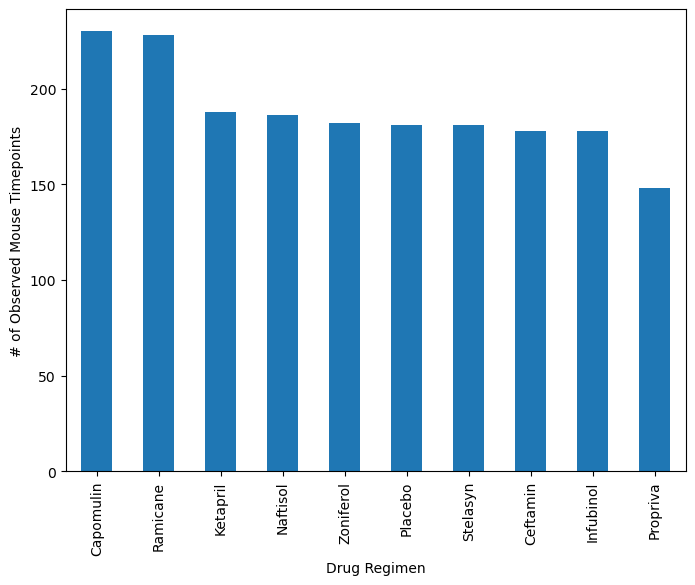

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mouseid_timepoints_gb = clean_mice_data_df.groupby(['Drug Regimen']).count()['Timepoint'].sort_values(ascending=False)
mouseid_timepoints_gb.plot(kind = 'bar', figsize = (8,6), xlabel = 'Drug Regimen', ylabel = '# of Observed Mouse Timepoints')


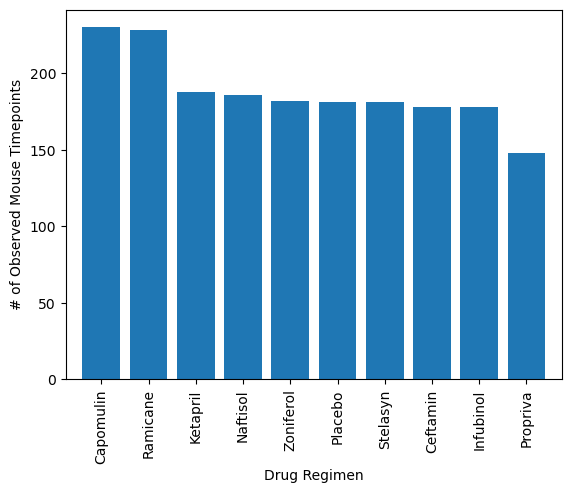

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouseid_timepoints_gb = clean_mice_data_df.groupby(['Drug Regimen']).count()['Timepoint'].sort_values(ascending=False)
x_axis = mouseid_timepoints_gb.index
y_axis = mouseid_timepoints_gb
plt.bar(x_axis, y_axis)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xticks(rotation="vertical")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

<Axes: ylabel='Sex'>

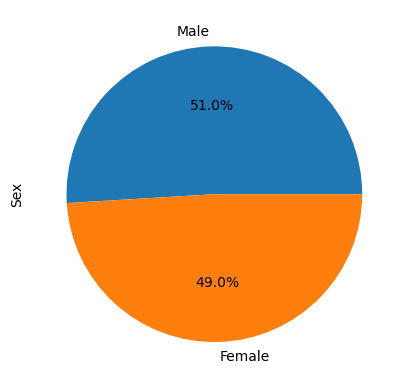

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_mice_sex_df = clean_mice_data_df['Sex'].value_counts()
pie_mice_sex_df.plot(kind= 'pie', autopct="%1.1f%%")


Text(0, 0.5, 'Sex')

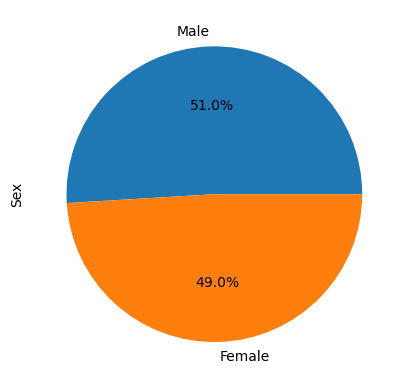

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_mice_sex_df = clean_mice_data_df['Sex'].value_counts()
halves = ['Male', 'Female']
plt.pie(pie_mice_sex_df, labels=halves, autopct="%1.1f%%")
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_drug_timepoint = clean_mice_data_df.loc[clean_mice_data_df.groupby('Mouse ID')['Timepoint'].idxmax()]

final_tumor_vol_capomulin = final_drug_timepoint[final_drug_timepoint['Drug Regimen'] == 'Capomulin']
final_tumor_vol_ramicane = final_drug_timepoint[final_drug_timepoint['Drug Regimen'] == 'Ramicane']
final_tumor_vol_infubinol = final_drug_timepoint[final_drug_timepoint['Drug Regimen'] == 'Infubinol']
final_tumor_vol_ceftamin = final_drug_timepoint[final_drug_timepoint['Drug Regimen'] == 'Ceftamin']

# Now I that I have found the max values, I need to only get the final volume for each mouse.
final_tumor_vol = final_drug_timepoint['Tumor Volume (mm3)']

# Merge this group df with the original DataFrame to get the tumor 
clean_mice_data_df['Final Tumor Vol (mm3)'] = final_tumor_vol

clean_mice_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Vol (mm3)
0,k403,Ramicane,Male,21,16,0,45.000000,0,NaN
1,k403,Ramicane,Male,21,16,5,38.825898,0,NaN
2,k403,Ramicane,Male,21,16,10,35.014271,1,NaN
3,k403,Ramicane,Male,21,16,15,34.223992,1,NaN
4,k403,Ramicane,Male,21,16,20,32.997729,1,NaN
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,NaN
1889,z969,Naftisol,Male,9,30,30,65.841013,3,NaN
1890,z969,Naftisol,Male,9,30,35,69.176246,4,NaN
1891,z969,Naftisol,Male,9,30,40,70.314904,4,NaN


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_final_vol = clean_mice_data_df.loc[clean_mice_data_df['Drug Regimen'] == treatment, 'Final Tumor Vol (mm3)']
    
    #Set up the quartiles for the lower/upper IQRs.
    quartiles = tumor_final_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    IQR = upperq - lowerq
    lower_iqr = lowerq - (1.5 * IQR)
    upper_iqr = upperq + (1.5 * IQR)
    
    #appends each tumor final volume to an empty list to be used later
    tumor_vol_data.append(tumor_final_vol)
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_final_vol[(tumor_final_vol > upper_iqr) | (tumor_final_vol < lower_iqr)]

    print(f'{treatment}\'s potential outliers: {outliers}')

Infubinol's potential outliers: 669    36.321346
Name: Final Tumor Vol (mm3), dtype: float64
{36.83290494999999} {82.74144559000001}
Ceftamin's potential outliers: Series([], Name: Final Tumor Vol (mm3), dtype: float64)
{25.355449580000002} {87.66645829999999}
Ramicane's potential outliers: Series([], Name: Final Tumor Vol (mm3), dtype: float64)
{17.912664470000003} {54.30681135}
Capomulin's potential outliers: Series([], Name: Final Tumor Vol (mm3), dtype: float64)
{20.70456164999999} {51.83201549}


Text(0, 0.5, 'Final Tumor Volume (mm3)')

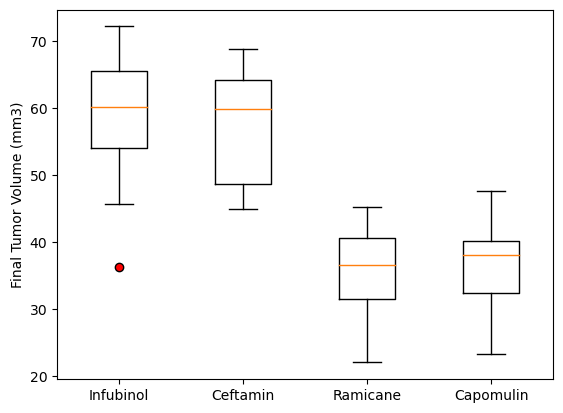

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Utilize .fillna() to replace anything that isn't already a float with 0.  Then remove the 0's and replace them with nothing.
# This will allow my tumor_vol_data to be used for charting since there wont be any erroneous values present.

tumor_vol_data = [x.fillna(0)[x.fillna(0) !=0] for x in tumor_vol_data]

flierprops = dict(marker='o', markerfacecolor='red')
plt.boxplot(tumor_vol_data, notch= False, labels = treatments, flierprops = flierprops)
plt.ylabel('Final Tumor Volume (mm3)')


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse b128')

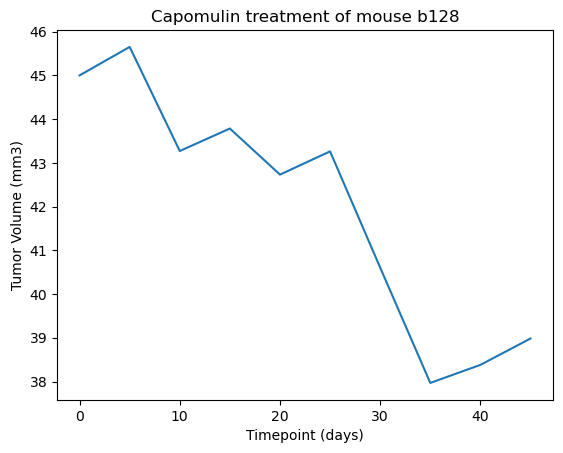

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# choose a mouse by "Mouse ID" declare it to a variable so it can easily be changed
mouse = 'b128'

# make a new data frame that has the total values of the chosen mouse on Capomulin for both the time point and the tumor volume
capomulin_vol_data = clean_mice_data_df.loc[(clean_mice_data_df['Drug Regimen']=='Capomulin') & (clean_mice_data_df['Mouse ID']==mouse), ['Tumor Volume (mm3)']]
capomulin_timepoint_data = clean_mice_data_df.loc[(clean_mice_data_df['Drug Regimen']=='Capomulin') & (clean_mice_data_df['Mouse ID']==mouse), ['Timepoint']]

# Plot them as a line pyplot
plt.plot(capomulin_timepoint_data, capomulin_vol_data)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {mouse}')


Text(0.5, 1.0, 'Capomulin treatment')

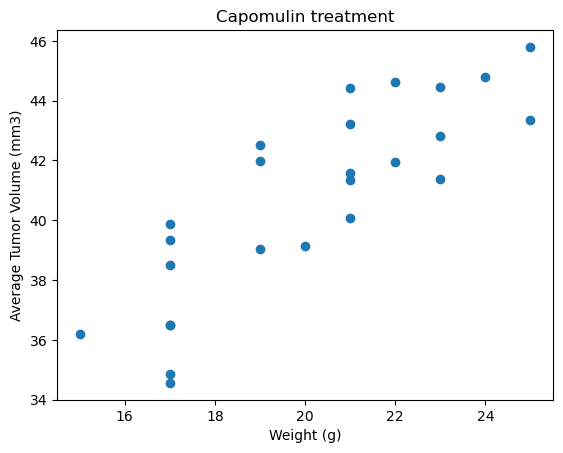

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# extract all of the values for mice that were on Capomulin
capomulin_data = clean_mice_data_df.loc[clean_mice_data_df['Drug Regimen'] == 'Capomulin', ['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]

# average each mouses value
average_capomulin_tumor = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# merge the weight and average tumor volume datas together.
capomulin_merged = pd.merge(average_capomulin_tumor, capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

# pyplot the scatter plot.
plt.scatter(capomulin_merged['Weight (g)'], capomulin_merged['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin treatment')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


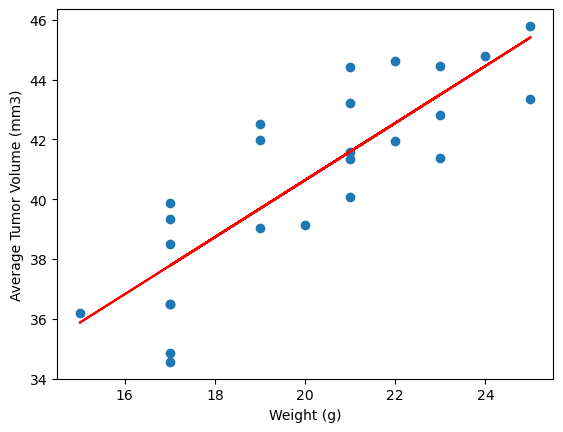

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# import linregress to make the linear regression model easier to calculate

# Declare the mouse weight, and the average tumor weight of each mouse as variables.
mouse_weight = capomulin_merged['Weight (g)']
avg_tumor_weight = capomulin_merged['Tumor Volume (mm3)']

# set up the variables for the linear regression model.
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, average_capomulin_tumor)
regress_values = mouse_weight * slope + intercept

# Calculate the correlation coefficient between mouse weight and average tumor weight
correlation = st.pearsonr(mouse_weight,avg_tumor_weight)
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

#Plot both the scatter of the mouse weight vs. tumor weight for 'Capomulin'.
plt.scatter(mouse_weight, avg_tumor_weight)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Plot the linear regression model ontop of the scatterplot
plt.plot(mouse_weight,regress_values,"r-")
